### Sample notebook for CNN learning  

#### Import libraries  

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dropout,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.utils import to_categorical

#### Parameters   

In [2]:
w=56
work_dir='data/dogs_cats'
npy_data_base='dogs_cats-data'
npy_labels_base='dogs_cats-labels'
classes=['dogs','cats']
num_classes=len(classes)

model_file="dogs_cats-model-w{0}.h5".format(w)
history_file="dogs_cats-history-w{0}.csv".format(w)

#### Read train/test data from npy file
X: 0-1 (float16), y: one-hot encoding  

In [3]:
mode="train"
npy_data_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_data_base,mode,w)
npy_labels_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_labels_base,mode,w)
X_train=np.load(npy_data_file).astype("float16")
X_train/=255
y_train=np.load(npy_labels_file)
y_train=to_categorical(y_train,num_classes)

mode="test"
npy_data_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_data_base,mode,w)
npy_labels_file="{0}/{1}-{2}-w{3}.npy".format(work_dir,npy_labels_base,mode,w)
X_test=np.load(npy_data_file).astype("float16")
X_test/=255
y_test=np.load(npy_labels_file)
y_test=to_categorical(y_test,num_classes)

print( X_train.shape )
print( y_train.shape )
print( X_test.shape )
print( y_test.shape )
img_rows=X_train.shape[1]
img_cols=X_train.shape[2]
img_channels=X_train.shape[3]
print("image_size:", img_rows, img_cols)
print("image_channels:", img_channels)

(2000, 56, 56, 3)
(2000, 2)
(400, 56, 56, 3)
(400, 2)
image_size: 56 56
image_channels: 3


#### Build CNN structure  

In [4]:
input_shape=(img_rows,img_cols,img_channels)
model=Sequential()
model.add(Conv2D(16, (3,3), activation='relu', padding='same',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4

#### Training of CNN  

In [5]:
%%time
n_epochs=40
val_split=0.2
batch_size=128
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])
cl=CSVLogger(history_file)
#fit_log=model.fit(X_train, y_train, batch_size=batch_size,
#                  epochs=n_epochs, validation_split=val_split,
#                  callbacks=[cl])
#if you want to use early stopping, uncomment the following lines
es=EarlyStopping(monitor='val_loss',patience=7,verbose=1)
fit_log=model.fit(X_train, y_train, batch_size=batch_size,
                  epochs=n_epochs, validation_split=val_split,
                  callbacks=[cl, es])

Train on 1600 samples, validate on 400 samples
Epoch 1/40
1600/1600 [==============================] - 11s 7ms/sample - loss: 0.6828 - accuracy: 0.6056 - val_loss: 0.9562 - val_accuracy: 0.0000e+00
Epoch 2/40
1600/1600 [==============================] - 2s 2ms/sample - loss: 0.6535 - accuracy: 0.6250 - val_loss: 0.8151 - val_accuracy: 0.0000e+00
Epoch 3/40
1600/1600 [==============================] - 2s 1ms/sample - loss: 0.6396 - accuracy: 0.6338 - val_loss: 0.7779 - val_accuracy: 0.1175
Epoch 4/40
1600/1600 [==============================] - 2s 1ms/sample - loss: 0.6325 - accuracy: 0.6500 - val_loss: 0.8194 - val_accuracy: 0.1225
Epoch 5/40
1600/1600 [==============================] - 2s 1ms/sample - loss: 0.6079 - accuracy: 0.6681 - val_loss: 0.7805 - val_accuracy: 0.3425
Epoch 6/40
1600/1600 [==============================] - 2s 1ms/sample - loss: 0.6047 - accuracy: 0.6694 - val_loss: 0.7107 - val_accuracy: 0.5550
Epoch 7/40
1600/1600 [==============================] - 2s 1ms/sampl

#### Plot of loss/accuracy during training  

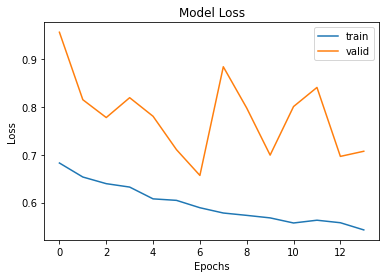

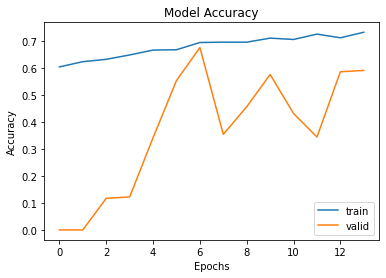

In [6]:
plt.plot(fit_log.history['loss'], label='train')
plt.plot(fit_log.history['val_loss'], label='valid')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(fit_log.history['accuracy'], label='train')
plt.plot(fit_log.history['val_accuracy'], label='valid')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Plot of loss/accuracy during training (from history file)  

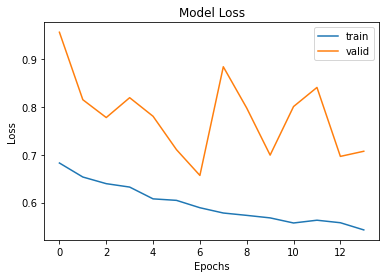

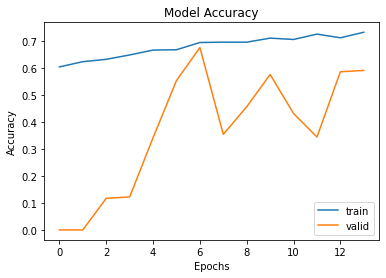

In [7]:
h=np.loadtxt(history_file, delimiter=',', skiprows=1)
epoch=h[:,0]
acc=h[:,1]
loss=h[:,2]
val_acc=h[:,3]
val_loss=h[:,4]

plt.plot(epoch, loss, label='train')
plt.plot(epoch, val_loss, label='valid')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epoch, acc, label='train')
plt.plot(epoch, val_acc, label='valid')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Accuracy against test data (Generalization performance)  

In [8]:
score=model.evaluate(X_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.6150437307357788
accuracy= 0.655


#### Save model file  

In [9]:
model.save(model_file)